# Essais régression avec données simples générées

#__Réseau simple avec une seule couche cachée et une fonction d'activation *Relu*.__


In [93]:
# Génère les données
import numpy as np
from random import random
from sklearn.model_selection import train_test_split

import numpy.random as npr
x= npr.uniform(-2,1,900)
y=x*x

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)


In [94]:
# Build the model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from keras.utils.vis_utils import plot_model

inp = Input((1,))
h = Dense(10)(inp)
h1 = Activation ("relu")(h)
out = Dense(1)(h1)
model = Model(inputs=inp, outputs=out)
model.compile(Adam(),mean_squared_error)
print(model.summary())

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_74 (Dense)             (None, 10)                20        
_________________________________________________________________
activation_48 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
plot_model(model,show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [96]:
H = model.fit(X_train,y_train,epochs=100,batch_size=30,validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.1763e-07 - accuracy: 0.0000e+00 - val_loss: 1.3222e-07 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1929e-07 - accuracy: 0.0000e+00 - val_loss: 1.3222e-07 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 1.0830e-07 - accuracy: 0.0000e+00 - val_loss: 1.3222e-07 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 1.2069e-07 - accuracy: 0.0000e+00 - val_loss: 1.3222e-07 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2680e-07 - accuracy: 0.0000e+00 - val_loss: 1.3222e-07 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 1.2773e-07 - accuracy: 0.0000e+00 - val_loss: 1.3222e-07 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 1m

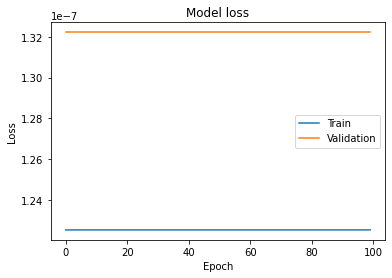

6/6 [==============================] - 0s 662us/step - loss: 1.2435e-07 - accuracy: 0.0000e+00
Le loss sur le jeu de test est : [1.2434932727956038e-07, 0.0]


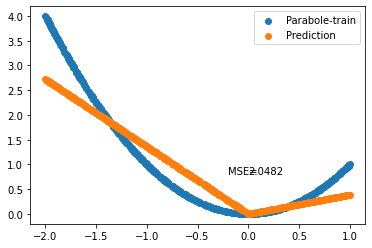

Text(0, 0.8, '1.9409')

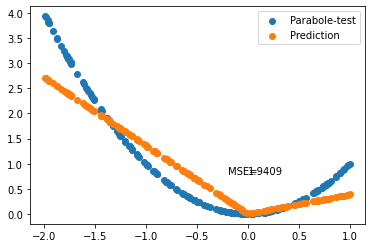

In [97]:
# Show results
import matplotlib.pyplot as plt

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss = model.evaluate(X_test,y_test)
print('Le loss sur le jeu de test est :' ,test_loss)

# observed vs predicted for training
pred_train=model.predict(X_train)
plt.scatter(X_train,y_train)
plt.scatter(X_train,pred_train)
plt.legend(['Parabole-train', 'Prediction'])
plt.text(-0.2,0.8,'MSE=')
plt.text(0,0.8,np.round(np.mean((pred_train-y_train)**2),4))
plt.show()

# observed vs predicted for test
pred=model.predict(X_test)
plt.scatter(X_test,y_test)
plt.scatter(X_test,pred)
plt.legend(['Parabole-test', 'Prediction'])
plt.text(-0.2,0.8,'MSE=')
plt.text(0,0.8,np.round(np.mean((pred-y_test)**2),4))

# Réseau avec plusieurs couches cachées

In [98]:
inp = Input((1,))
h = Dense(6)(inp)
h1 = Activation ("relu")(h)
h2 = Dense(4) (h1)
h3 = Activation ("sigmoid")(h2)
h4 = Dense(4) (h3)
h5 = Activation ("relu")(h4)
out = Dense(1)(h5)

model = Model(inputs=inp, outputs=out)
model.compile(Adam(),mean_squared_error)

H = model.fit(X_train,y_train,epochs=150,batch_size=30,validation_split=0.2)


Epoch 1/150
20/20 [==============================] - 0s 4ms/step - loss: 2.6031 - val_loss: 2.7829
Epoch 2/150
20/20 [==============================] - 0s 1ms/step - loss: 2.3285 - val_loss: 2.5530
Epoch 3/150
20/20 [==============================] - 0s 1ms/step - loss: 2.4635 - val_loss: 2.4583
Epoch 4/150
20/20 [==============================] - 0s 1ms/step - loss: 2.2029 - val_loss: 2.3767
Epoch 5/150
20/20 [==============================] - 0s 1ms/step - loss: 2.0997 - val_loss: 2.2914
Epoch 6/150
20/20 [==============================] - 0s 1ms/step - loss: 1.8910 - val_loss: 2.2010
Epoch 7/150
20/20 [==============================] - 0s 1ms/step - loss: 1.8785 - val_loss: 2.1046
Epoch 8/150
20/20 [==============================] - 0s 1ms/step - loss: 1.9236 - val_loss: 2.0034
Epoch 9/150
20/20 [==============================] - 0s 1ms/step - loss: 1.7263 - val_loss: 1.9015
Epoch 10/150
20/20 [==============================] - 0s 1ms/step - loss: 1.7242 - val_loss: 1.7972
Epoch 11/

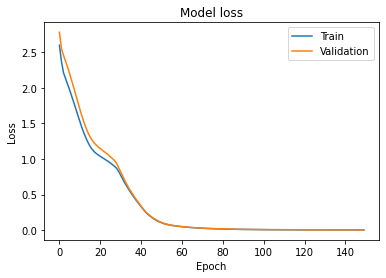

6/6 [==============================] - 0s 882us/step - loss: 0.0024
Le loss sur le jeu de test est : 0.0023612510412931442


Text(0, 0.8, '2.4332')

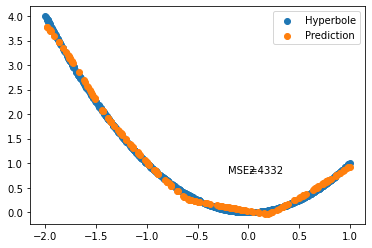

In [99]:
# Show results
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss = model.evaluate(X_test,y_test)
print('Le loss sur le jeu de test est :' ,test_loss)

pred=model.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,pred)
plt.legend(['Hyperbole', 'Prediction'])
plt.text(-0.2,0.8,'MSE=')
plt.text(0,0.8,np.round(np.mean((pred-y_test)**2),4))

#__TODO__
* Augmenter la taille de l'échantillon
* Ajouter du bruit à la fonction y=x^2 avec par exmple npr.normal
* Que donne la prévision pour des valeurs tests en dehors ed l'intervalle [-1,1]

